In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 21 10:51:08 2017
Regression Analysis on Insurance companies Data set
@author: imtiaz
"""
#Importing required python packages
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import seaborn



In [2]:
insurExpenses=pd.read_csv("NAICExpense.csv")
insurExpenses.describe()

#Description of variables in data

#'EXPENSES : Total Expenses incurred in millions of dollars (dependent variable)

# Independent Variables or Predictor variables

#'GROUP'        : Indicates if the company is affliated
#'MUTUAL'       : Indicates if the company is mutual
#'STOCK'        : Indicates if the company is stock company
#'RBC'          : Risk based capital
#'STAFFWAGE'    : Annual average wage of insurers administrative staff in thousands of dollars
#'AGENTWAGE'    : Annual average wage of insurance agent in thousands of dollars
#'LONGLOSS'     : Losses incurred for long tail lines in millions of dollars
#'SHORTLOSS'    : Losses incurrred for short tail lines in millions of dollars
#'GPWPERSONAL'  : Gross premium written for personal lines , in millions of dollars
#'GPWCOMM'      : Gross premium written for commercial lines, in millions of dollars
#'ASSETS'       : Net admitted assets , in millions of dollars
#'CASH'         : cash and invested assets , in millions of dollars
#'LIQUIDRATIO'  : The ratio of liquid assets to current liabilities level.


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
count,384.000000,384.000000,384.000000,3.840000e+02,384.000000,384.000000,365.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.611979,0.187500,0.682292,2.246615e+10,0.043190,87.181866,80.153508,0.024926,0.037359,0.053113,0.122657,0.356543,0.332871,92.597243
std,0.487935,0.390822,0.466193,7.231735e+10,0.120961,11.803160,9.103964,0.083226,0.120238,0.173604,0.317549,1.014505,0.969495,16.604765
min,0.000000,0.000000,0.000000,0.000000e+00,-0.002038,51.726894,47.471275,-0.070623,-0.003169,-0.003751,-0.000648,0.000321,0.000018,1.788266
25%,0.000000,0.000000,0.000000,6.256605e+08,0.001584,80.055741,NaN,0.000000,0.000237,0.000000,0.003838,0.012758,0.011377,87.403150
50%,1.000000,0.000000,1.000000,2.753084e+09,0.008504,84.381821,NaN,0.001784,0.004024,0.000312,0.023807,0.056746,0.050469,96.027121
75%,1.000000,0.000000,1.000000,1.117858e+10,0.029826,93.824770,NaN,0.011280,0.021794,0.027258,0.086440,0.197437,0.184971,103.860832
max,1.000000,1.000000,1.000000,8.387967e+11,1.236946,137.480966,126.170281,0.853915,1.171059,1.822486,4.189401,8.705380,8.823477,127.857517


In [3]:
insurExpenses.columns
insurExpenses.drop("COMPANY_NAME",1,inplace=True)
#Peek at the first few rows
insurExpenses.head(10)
#Dimensions of data
insurExpenses.shape
#types
insurExpenses.dtypes



GROUP            int64
MUTUAL           int64
STOCK            int64
RBC              int64
EXPENSES       float64
STAFFWAGE      float64
AGENTWAGE      float64
LONGLOSS       float64
SHORTLOSS      float64
GPWPERSONAL    float64
GPWCOMM        float64
ASSETS         float64
CASH           float64
LIQUIDRATIO    float64
dtype: object

In [4]:
        
#Treatment of missing values in the data , There are 19 values in AGENTWAGE in the data 
#which are missing
sum(pd.isnull(insurExpenses['AGENTWAGE']))
insurance = insurExpenses[pd.notnull(insurExpenses['AGENTWAGE'])]
insurance.shape



(365, 14)

In [5]:
#Standardization of the data
scaled=StandardScaler().fit(insurance)
scaledData=scaled.transform(insurance)

type(scaledData)
scaledInsurData=pd.DataFrame(scaledData,columns=insurance.columns)
scaledInsurData.shape
scaledInsurData.head(3)




,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
0,-1.238839,-0.495715,0.699854,-0.299520,-0.357126,-0.239419,-0.296158,-0.301151,-0.313776,-0.314816,-0.387000,-0.344554,-0.336280,1.107480
1,-1.238839,-0.495715,-1.428869,-0.280361,-0.327309,-0.477635,0.519664,-0.270625,-0.313776,-0.314816,-0.353209,-0.325872,-0.319499,-0.174405
2,-1.238839,2.017286,-1.428869,-0.296854,-0.348207,-0.239419,-0.296158,-0.291448,-0.302942,-0.314816,-0.375673,-0.342934,-0.336035,-0.975915


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


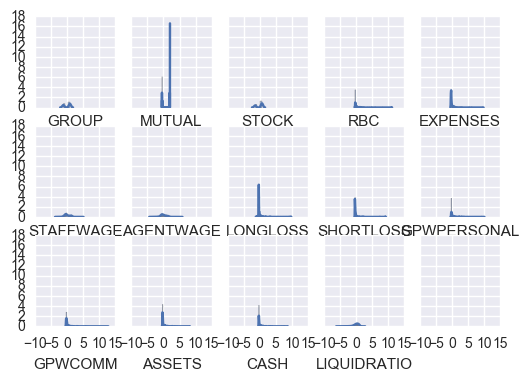

In [7]:
#univariate distribution
%matplotlib inline
fig, ax = pyplot.subplots(nrows=3, ncols=5, sharex=True, sharey=True)
l=[axis for p in ax for axis in p]
for i,column in enumerate(scaledInsurData.columns):
    seaborn.distplot(scaledInsurData[column],ax=l[i])



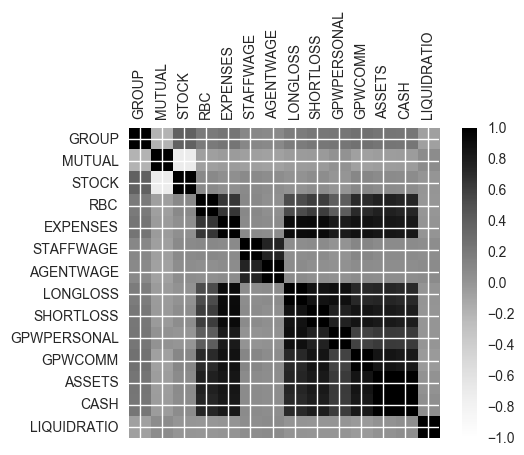

In [8]:
  #Multivariate plots : Scatter plot matrix
correlations = scaledInsurData.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(insurExpenses.columns,rotation=90)
ax.set_yticklabels(insurExpenses.columns)
pyplot.show()

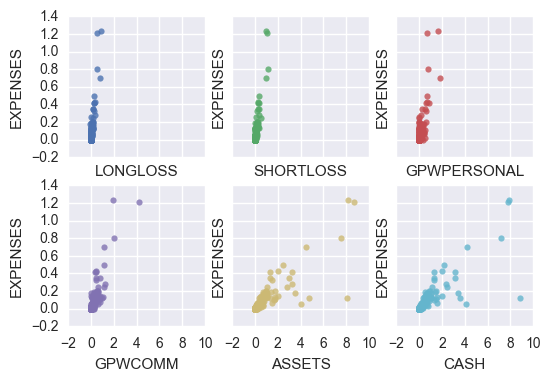

In [10]:
# We see here from the correlation matrix Expenses are highly correlated with 
#longloss , shortloss, gpwperson,gpwcomm assests and cash , lets plot the scatter plot to confirm.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = pyplot.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
seaborn.regplot(x="LONGLOSS", y="EXPENSES", scatter=True,fit_reg=False, data=insurance,ax=ax1)
seaborn.regplot(x="SHORTLOSS", y="EXPENSES", scatter=True,fit_reg=False, data=insurance,ax=ax2)
seaborn.regplot(x="GPWPERSONAL", y="EXPENSES", scatter=True,fit_reg=False, data=insurance,ax=ax3)
seaborn.regplot(x="GPWCOMM", y="EXPENSES", scatter=True,fit_reg=False, data=insurance,ax=ax4)
seaborn.regplot(x="ASSETS", y="EXPENSES", scatter=True,fit_reg=False, data=insurance,ax=ax5)
seaborn.regplot(x="CASH", y="EXPENSES", scatter=True,fit_reg=False, data=insurance,ax=ax6)


In [11]:
#Indeed from the scatter plots we can say the dependent variable EXPENSES is correlated with the input variables.
#Fitting the data in linear Regression Model
regressionModel=smf.ols('EXPENSES ~ GROUP+MUTUAL+STOCK+RBC+STAFFWAGE+AGENTWAGE+LONGLOSS+SHORTLOSS+GPWPERSONAL+GPWCOMM+ASSETS+CASH+LIQUIDRATIO',data=scaledInsurData).fit()
regressionModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               EXPENSES   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     453.9
Date:                Sun, 26 Feb 2017   Prob (F-statistic):          1.98e-210
Time:                        17:49:01   Log-Likelihood:                 7.6483
No. Observations:                 365   AIC:                             12.70
Df Residuals:                     351   BIC:                             67.30
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1.388e-17      0.013    1.1e-15      1.000        -0.025     0.025
GROUP           0.0046      0.015      0.319      0.750        -0.024     0.033
MUTUAL         -0.0074      0.018     -0.401      0.688        -0.044     0.029
STOCK          -0.0240      0.019     -1.237      0.217        -0.062     0.014
RBC             0.0407      0.024      1.687      0.093        -0.007     0.088
STAFFWAGE      -0.0022      0.020     -0.112      0.911        -0.041     0.036
AGENTWAGE       0.0036      0.020      0.184      0.854        -0.035     0.042
LONGLOSS        0.3571      0.039      9.175      0.000         0.281     0.434
SHORTLOSS       0.2182      0.035      6.168      0.000         0.149     0.288
GPWPERSONAL     0.1060      0.030      3.522      0.000         0.047     0.165
GPWCOMM         0.3040      0.032      9.517      0.000         0.241     0.367
ASSETS         -0.2438      0.190     -1.285      0.200        -0.617     0.129
CASH            0.2919      0.166      1.756      0.080        -0.035     0.619
LIQUIDRATIO     0.0088      0.013      0.667      0.505        -0.017     0.035
==============================================================================
Omnibus:                      109.509   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3415.596
Skew:                          -0.528   Prob(JB):                         0.00
Kurtosis:                      17.949   Cond. No.                         47.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#keeping only significant variables from the output and re-running the regression model again.

regressionSubsetModel= smf.ols('EXPENSES ~ LONGLOSS+SHORTLOSS+GPWPERSONAL+GPWCOMM', data=scaledInsurData).fit()
print (regressionSubsetModel.summary())

#These four variables explain 94% total variation in Expenses variable.


                            OLS Regression Results                            
Dep. Variable:               EXPENSES   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1417.
Date:                Sun, 26 Feb 2017   Prob (F-statistic):          8.64e-219
Time:                        17:49:34   Log-Likelihood:                -3.6204
No. Observations:                 365   AIC:                             17.24
Df Residuals:                     360   BIC:                             36.74
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1.388e-17      0.013   1.08e-15      

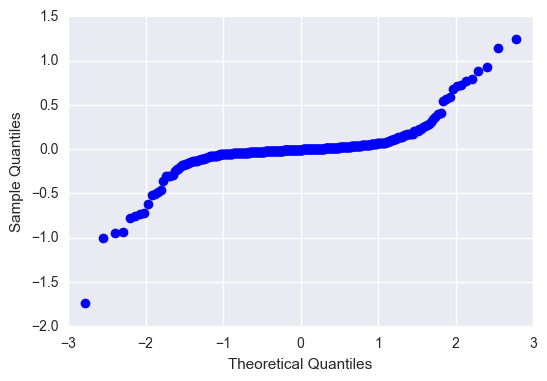

In [13]:
#Regression Diagonistics
#Linearity and Normality assumptions
#Normal probability plot of the standard residuals  : If the residuals are normally distributed
#the ordered residuals should be approximately the same as the ordered normalscores. The plot
#of this two should resemble a straight line under normality assumption

import statsmodels.api as sm
probplot = sm.ProbPlot(regressionModel.resid)
probplot.qqplot()
pyplot.show()

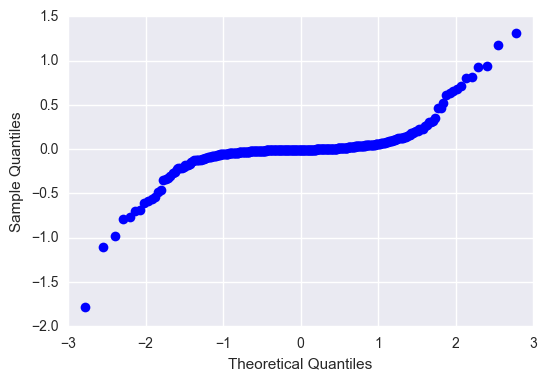

In [14]:
regressionLogModel=smf.ols('EXPENSES ~ LONGLOSS+SHORTLOSS+GPWCOMM+GPWPERSONAL+ASSETS',data=scaledInsurData).fit()
regressionLogModel.summary()


#The normal quantile plot is not linear , indicating there may be few extreme values in the dataset
probplot = sm.ProbPlot(regressionLogModel.resid)
probplot.qqplot()
pyplot.show()
#questions the normality of the errors

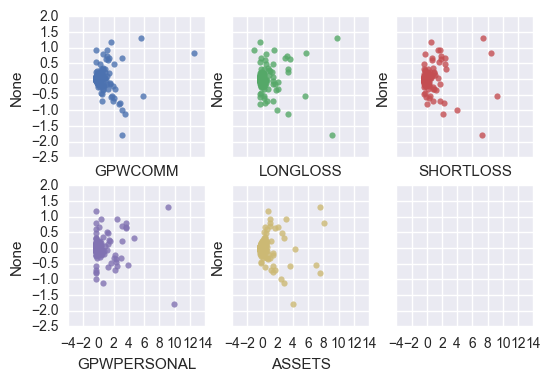

In [15]:
#Regressors vs Residuals : Expectation is that scatterplot must be random scatter
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = pyplot.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
seaborn.regplot(x=scaledInsurData['GPWCOMM'],y=regressionLogModel.resid,fit_reg=False,ax=ax1)
seaborn.regplot(x=scaledInsurData['LONGLOSS'],y=regressionLogModel.resid,fit_reg=False,ax=ax2)
seaborn.regplot(x=scaledInsurData['SHORTLOSS'],y=regressionLogModel.resid,fit_reg=False,ax=ax3)
seaborn.regplot(x=scaledInsurData['GPWPERSONAL'],y=regressionLogModel.resid,fit_reg=False,ax=ax4)
seaborn.regplot(x=scaledInsurData['ASSETS'],y=regressionLogModel.resid,fit_reg=False,ax=ax5)


<Container object of 3 artists>

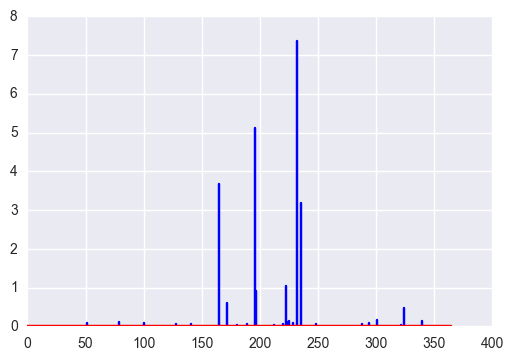

In [16]:
#influential observations detection
influence = regressionLogModel.get_influence()
(c, p) = influence.cooks_distance
pyplot.stem(np.arange(len(c)), c, markerfmt=",")


### conclusion:
##### Exploratory analysis and feasibility af regression have been expressed in this notebook.